# Run clouds over hits and store the output dataframe



### April 2021, JAH

In [9]:
%matplotlib inline
#%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [10]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

#to_df = pd.DataFrame.from_records

In [75]:
import hipy.utils        as ut
import hipy.pltext       as pltext
#import hipy.histos       as histos

import clouds        as clouds
import pltclouds     as pltclouds

#import next.reco.chits    as chits
import next.reco.display  as nplay
import next.core.io       as nio
import next.core.selection as nsel

import next.eres.eres      as eres

import next.reco.cloudsdia as cloudsdia
#import next.core.city     as ncity


In [12]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Thu Apr 22 16:11:57 2021


### load data

In [13]:
def get_clouds_filename(run_number):
    datadir    = f"/home/hernando/data/NEW"
    run_number = str(run_number)
    filename   = datadir + f'/clouds_ana_{run_number}.h5'
    return filename

def get_df(fname, table):
    return pd.read_hdf(fname, table)    


In [105]:
run_number = 8182
fname      = get_clouds_filename(run_number)
dft        = get_df(fname, 'tracks')
dfe        = get_df(fname, 'extremes.2')
nevents    = len(dft.groupby('event'))
print(fname)
print('len ', len(dft), 'number of events ', nevents)
nevents    = len(dfe.groupby('event'))
print('len ', len(dfe), 'number of events ', nevents)

/home/hernando/data/NEW/clouds_ana_8182.h5
len  3041 number of events  2760
len  6059 number of events  2760


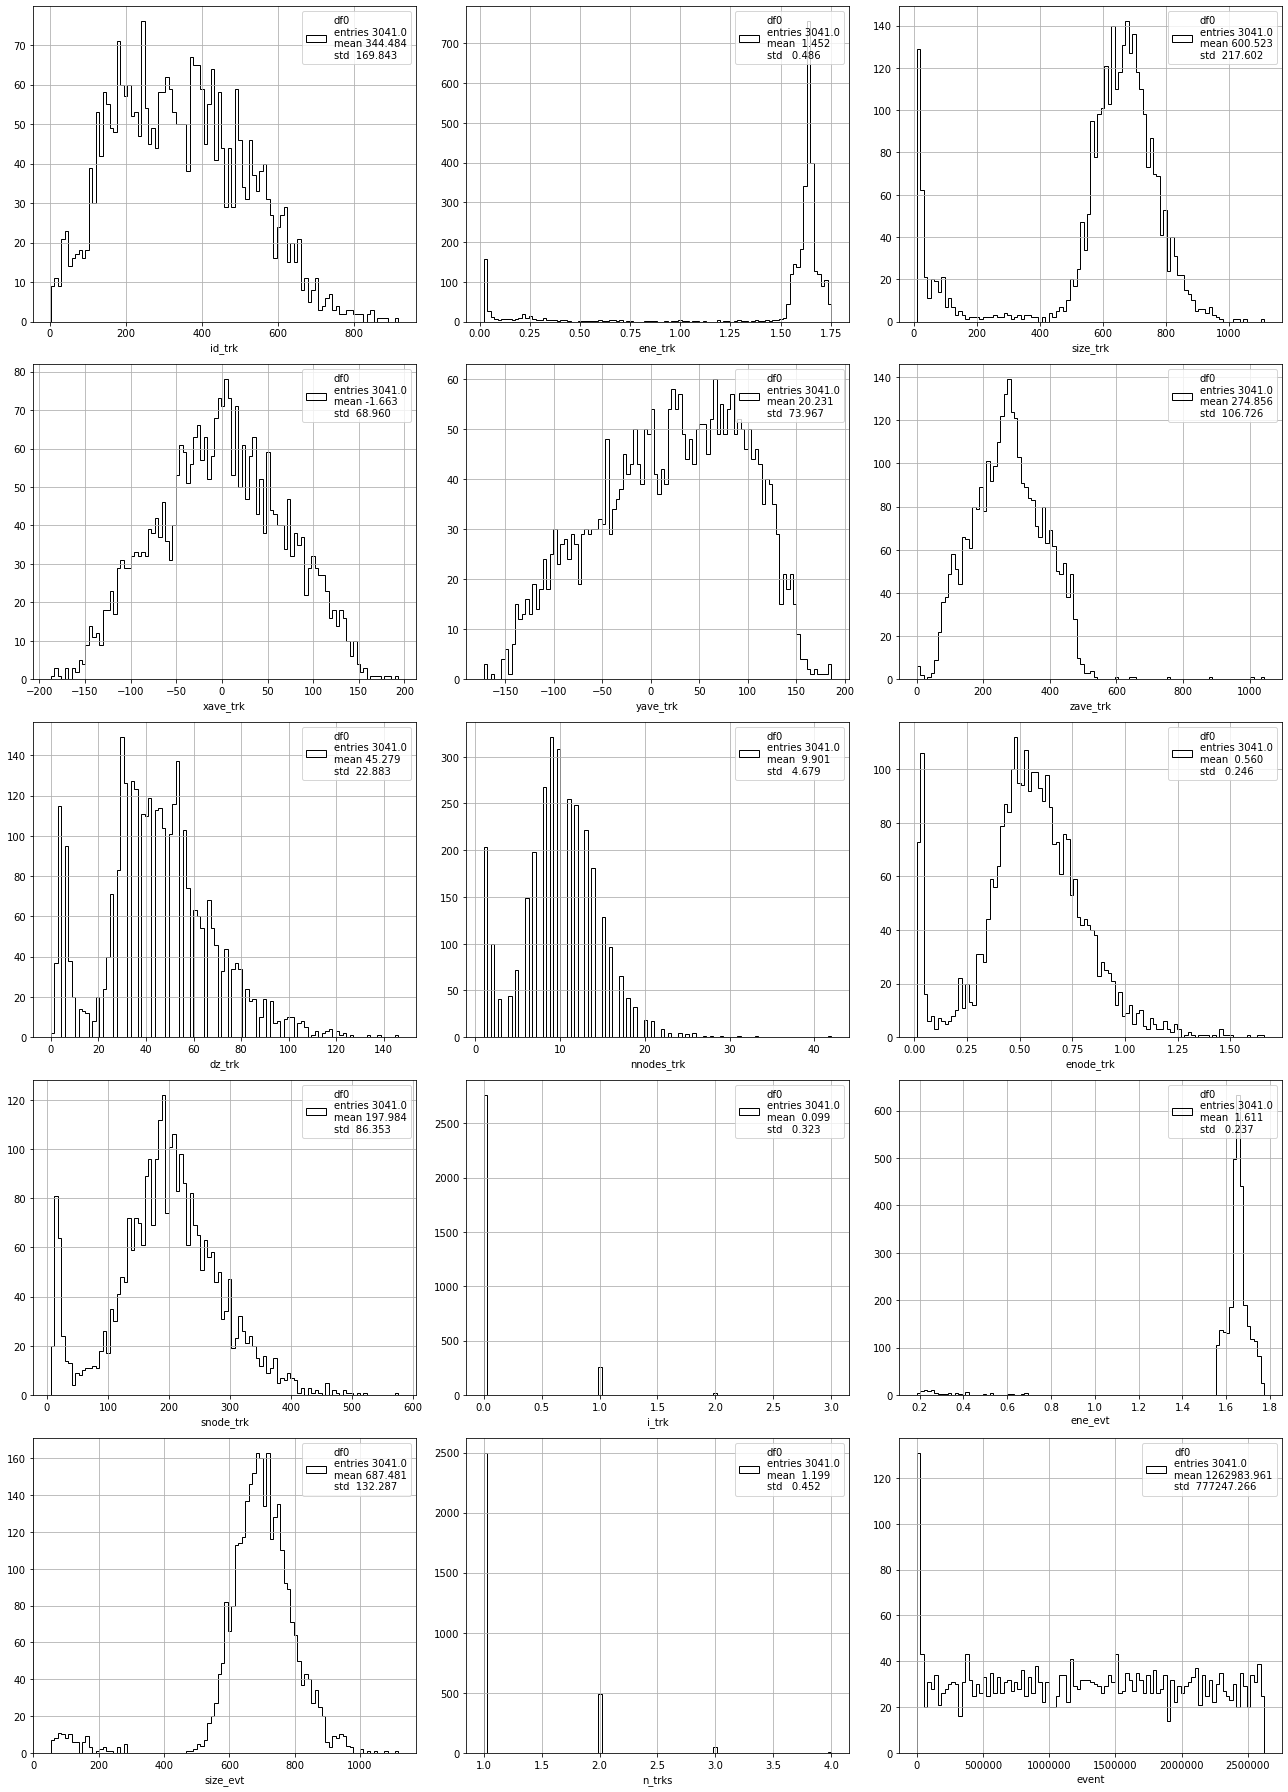

In [106]:
pltext.df_inspect(dft, ncolumns = 3)

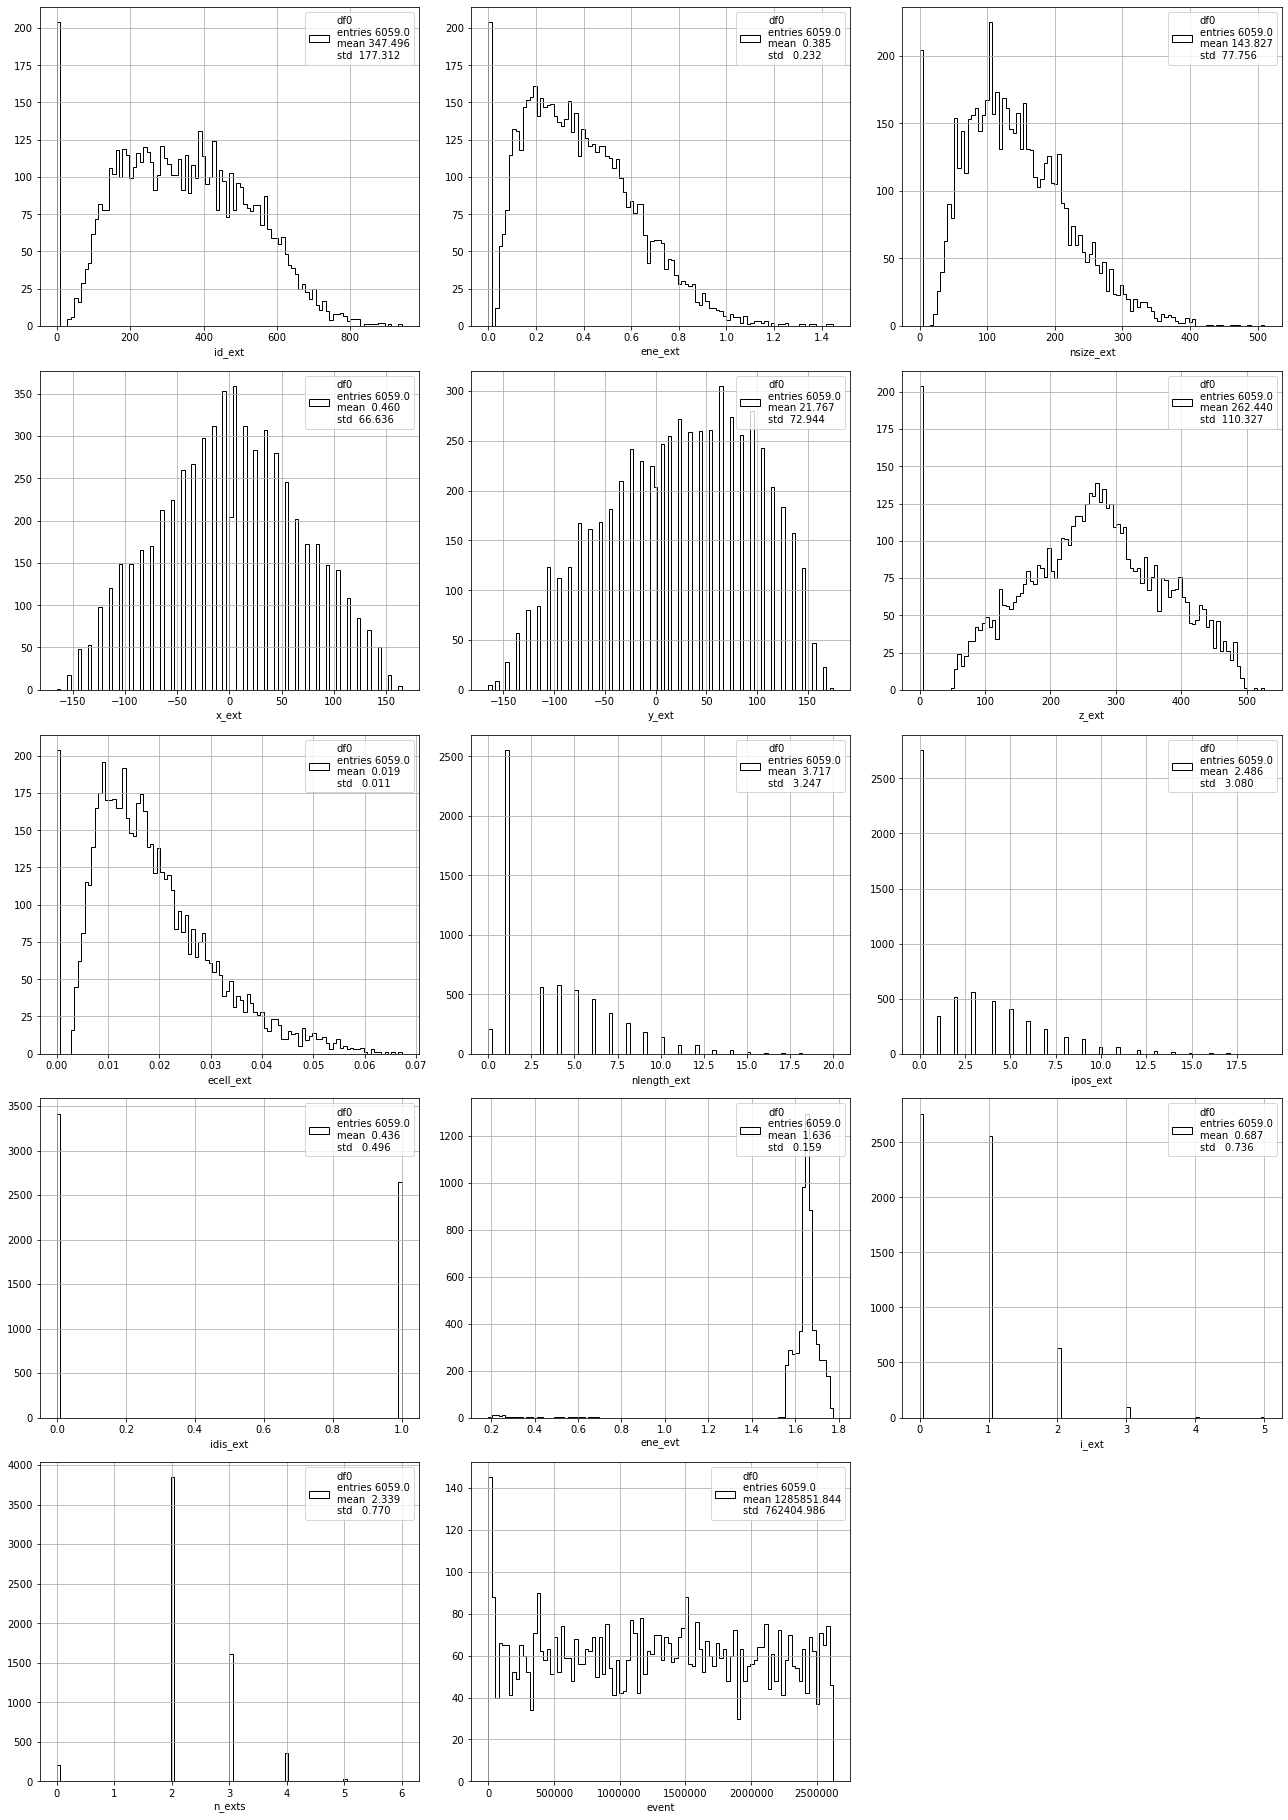

In [107]:
pltext.df_inspect(dfe, ncolumns = 3)

In [108]:
ranges = {}
ranges['n_exts']       = (1, 10)
ranges['ene_evt']      = (1.56, 1.75)
ecore = (1.60, 1.70)
ranges['ene_evt.core'] = (1.61, 1.69)
ranges['ene_evt.sbl']  = (1.56  , ecore[0])
ranges['ene_evt.sbu']  = (ecore[1], 1.75)
ranges['i_ext.0']      = (0, 0)
ranges['i_ext.1']      = (1, 1)
ranges['n_exts.2']     = (2, 2)

selections = nsel.Selections(dfe, ranges)

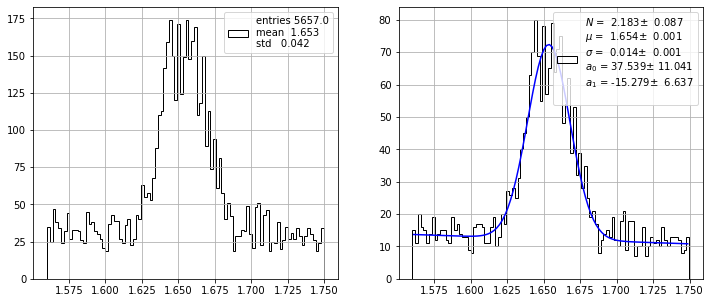

In [109]:
sel = selections.logical_and(('n_exts', 'ene_evt'), 'fidutial')

subplot = pltext.canvas(2)
subplot(1)
pltext.hist(dfe[sel].ene_evt, 100);
subplot(2)
sel0  = selections['i_ext.0']
pltext.hfit(dfe[sel0 & sel].ene_evt, 100, fun = 'gaus+poly.1', formate = '6.3f');

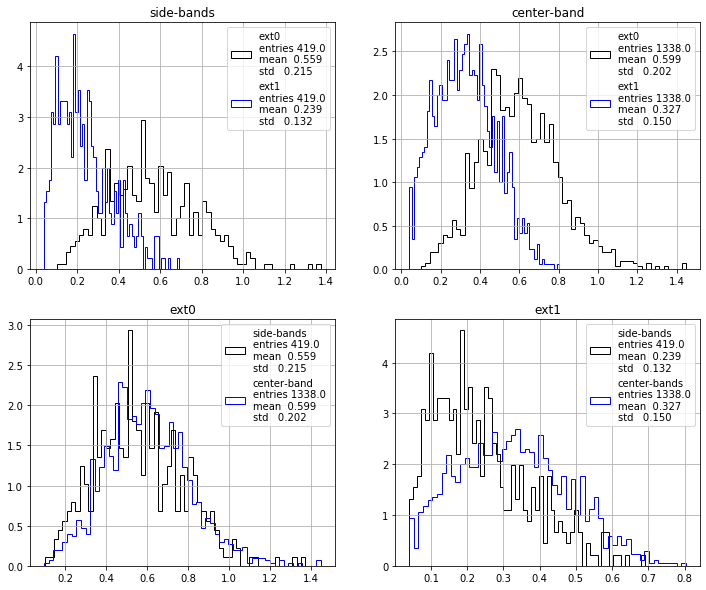

In [116]:
sel0  = selections['ene_evt'] & selections['n_exts.2'] & selections['i_ext.0']
sel1  = selections['ene_evt'] & selections['n_exts.2'] & selections['i_ext.1']
selsb = np.logical_or(selections['ene_evt.sbl'], selections['ene_evt.sbu'])
selcb = selections['ene_evt.core']

subplot = pltext.canvas(4)

subplot(1)
pltext.hist(dfe[sel0 & selsb].ene_ext, 60, label = 'ext0', density = True);
pltext.hist(dfe[sel1 & selsb].ene_ext, 60, label = 'ext1', density = True);
plt.title('side-bands'); plt.legend();
subplot(2)
pltext.hist(dfe[sel0 & selcb].ene_ext, 60, label = 'ext0', density = True);
pltext.hist(dfe[sel1 & selcb].ene_ext, 60, label = 'ext1', density = True);
plt.title('center-band'); plt.legend();

subplot(3)
pltext.hist(dfe[sel0 & selsb].ene_ext, 60, label = 'side-bands', density = True);
pltext.hist(dfe[sel0 & selcb].ene_ext, 60, label = 'center-band', density = True);
plt.title('ext0'); plt.legend();
subplot(4)
pltext.hist(dfe[sel1 & selsb].ene_ext, 60, label = 'side-bands', density = True);
pltext.hist(dfe[sel1 & selcb].ene_ext, 60, label = 'center-bands', density = True);
plt.title('ext1'); plt.legend();



overwriting  fidutial.2  selection


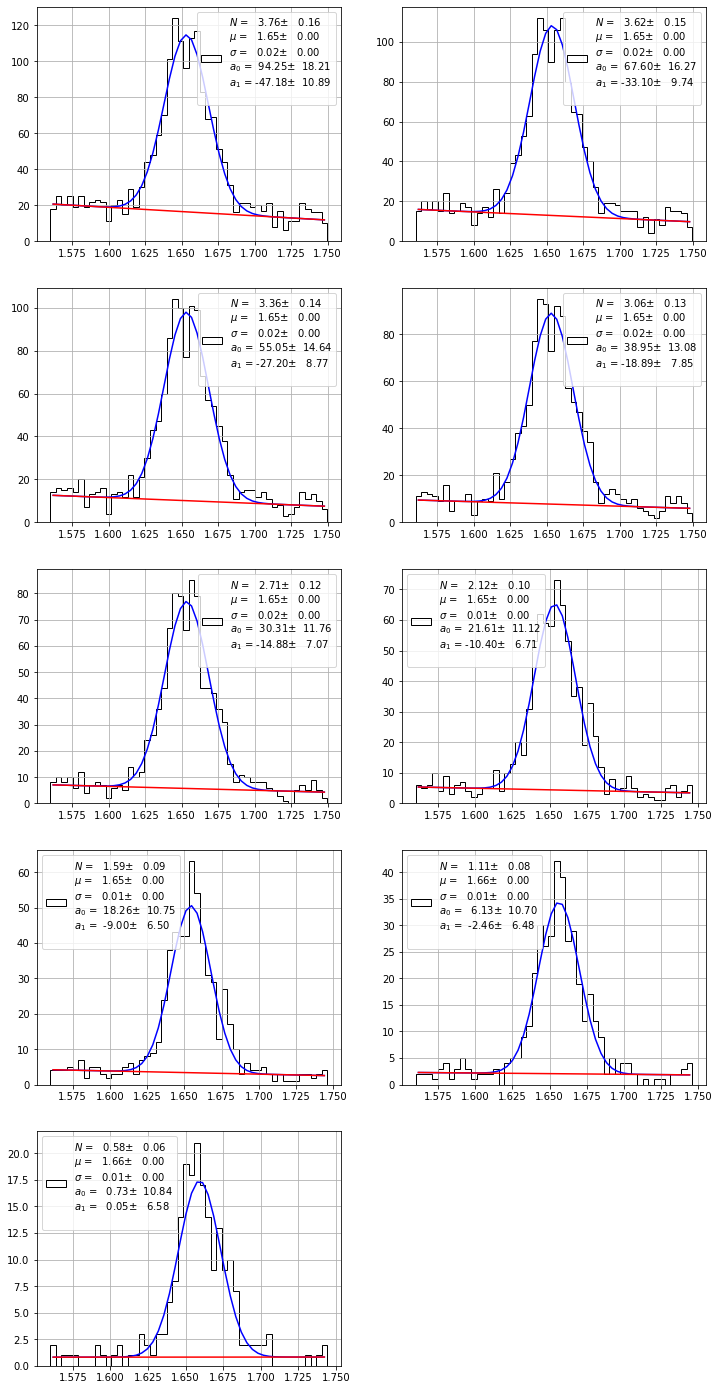

In [117]:
sel  = selections.logical_and(('n_exts.2', 'ene_evt'), 'fidutial.2')
sel0 = selections['i_ext.0']
sel0 = selections['i_ext.1']

ene    = dfe.ene_evt[sel & sel0].values
eblob2 = dfe.ene_ext[sel & sel1].values
nscan  = 10
mbins  = 50

eblob2_scan, nsigs, nbkgs = eres.ds_eblob2scan(ene, eblob2, nscan, mbins, plot = True)

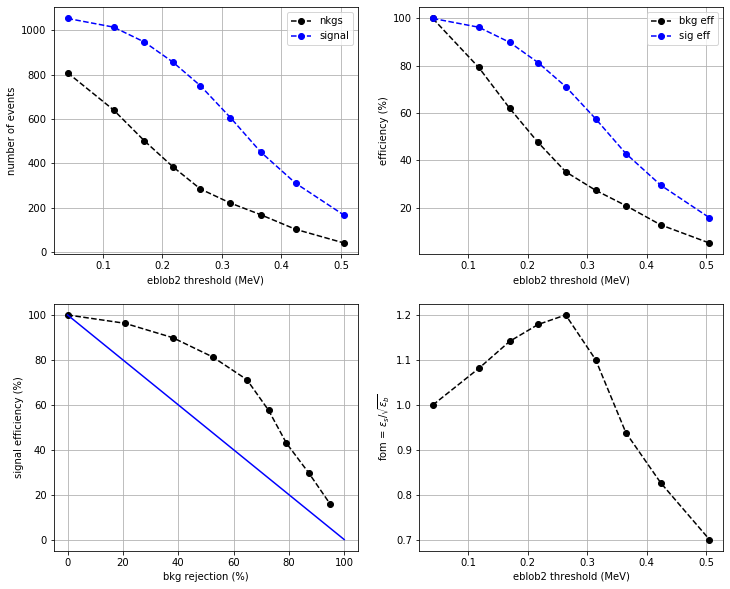

In [118]:
eres.plt_eblob2scan(eblob2_scan, nsigs, nbkgs)

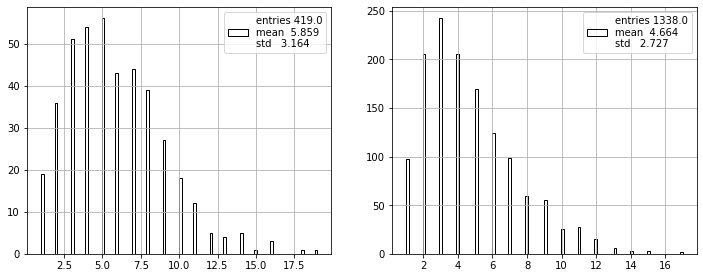

In [115]:
subplot = pltext.canvas(4)
subplot(1)
pltext.hist(dfe[sel1 & selsb].ipos_ext, 100);
subplot(2)
pltext.hist(dfe[sel1 & selcb].ipos_ext, 100);
#plt.scatter(dfe[sel1 & selsb].nlength_ext, dfe[sel1 & selsb].ene_ext, alpha = 0.05);
#plt.scatter(dfe[sel1 & selcb].nlength_ext, dfe[sel1 & selcb].ene_ext, alpha = 0.05);

In [ ]:
subplot = pltext.canvas(2)
subplot(1)
plt.scatter(dfe[sel0 & selsb].nlength_ext, dfe[sel1 & selsb].ene_ext, alpha = 0.1);
subplot(2)
plt.scatter(dfe[sel0 & selcb].ene_ext, dfe[sel1 & selcb].ene_ext, alpha = 0.1);